In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/samsung_stock.csv')

df.head(3)

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,2007-01-02,9109.592773,12520.0,12540.0,12320.0,12400.0,17607300
1,2007-01-03,8934.966797,12280.0,12560.0,12220.0,12540.0,19676500
2,2007-01-04,8818.548828,12120.0,12240.0,12060.0,12220.0,18258900


In [ ]:
df.rename(columns={'Unnamed: 0' : 'Date'}, inplace=True)

In [ ]:
df.head(3)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2007-01-02,9109.592773,12520.0,12540.0,12320.0,12400.0,17607300
1,2007-01-03,8934.966797,12280.0,12560.0,12220.0,12540.0,19676500
2,2007-01-04,8818.548828,12120.0,12240.0,12060.0,12220.0,18258900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4422 non-null   object 
 1   Adj Close  4422 non-null   float64
 2   Close      4422 non-null   float64
 3   High       4422 non-null   float64
 4   Low        4422 non-null   float64
 5   Open       4422 non-null   float64
 6   Volume     4422 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.0+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

In [ ]:
df.isnull().sum()

,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
df.duplicated().sum()

6

In [ ]:
df[df.duplicated() == 1]

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2008-06-06,10462.533203,14180.0,14180.0,14180.0,14180.0,0
2018-05-02,44440.742188,53000.0,53000.0,53000.0,53000.0,0
2018-05-03,44440.742188,53000.0,53000.0,53000.0,53000.0,0
2022-02-09,68776.093750,73000.0,73000.0,73000.0,73000.0,0
2022-02-22,70000.882812,74300.0,74300.0,74300.0,74300.0,0
2022-02-23,70000.882812,74300.0,74300.0,74300.0,74300.0,0


In [ ]:
df.drop_duplicates(inplace=True)

Q1. What is the trend of Samsung's stock price from 2007 to 2024?

In [ ]:
df.head(2)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2007-01-02,9109.592773,12520.0,12540.0,12320.0,12400.0,17607300
2007-01-03,8934.966797,12280.0,12560.0,12220.0,12540.0,19676500


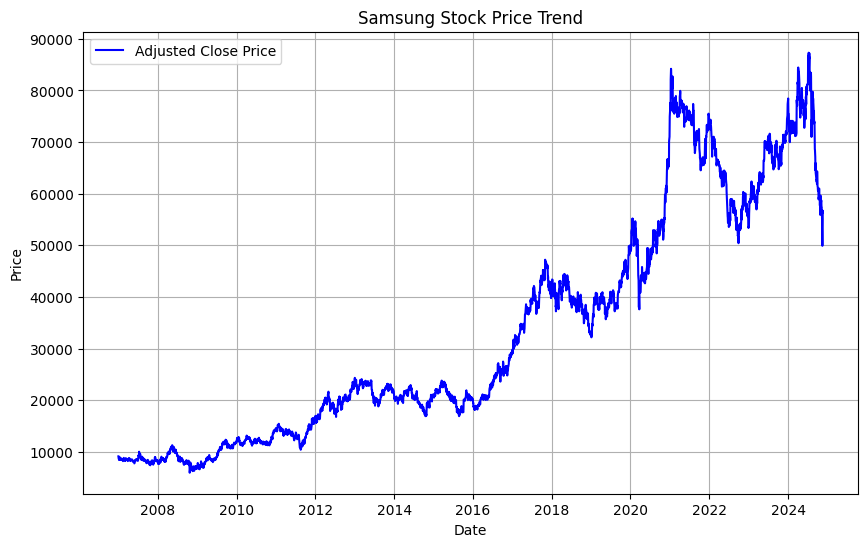

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(df['Adj Close'], label = 'Adjusted Close Price',color = 'blue')
plt.title('Samsung Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Q2. What are the highest and lowest adjusted close prices, and when did they occur?

In [ ]:
Highest_Price = df['Adj Close'].max()
Highest_Price

87310.109375

In [ ]:
Lowest_Price = df['Adj Close'].min()
Lowest_Price

5936.673828125

In [ ]:
Highest_Price_Date = df.groupby('Date')['Adj Close'].max().sort_values(ascending = False).index[0]
Highest_Price_Date

Timestamp('2024-07-10 00:00:00')

In [ ]:
Lowest_Price_Date = df.groupby('Date')['Adj Close'].min().sort_values(ascending = True).index[0]
Lowest_Price_Date

Timestamp('2008-10-24 00:00:00')

In [ ]:
print(f"Highest Adjusted Price : {Highest_Price:.2f} on {Highest_Price_Date}")
print(f"Lowest Adjusted Price : {Lowest_Price:.2f} on {Lowest_Price_Date}")

Highest Adjusted Price : 87310.11 on 2024-07-10 00:00:00
Lowest Adjusted Price : 5936.67 on 2008-10-24 00:00:00


Q3.How volatile is Samsung's stock on a daily basis?

In [ ]:
df['Daily_Change'] = df['Adj Close'].pct_change()
df['Daily_Change']

,Daily_Change
Date,
2007-01-02,NaN
2007-01-03,-0.019169
2007-01-04,-0.013029
2007-01-05,-0.018152
2007-01-08,-0.018487
...,...
2024-11-13,-0.045283
2024-11-14,-0.013834
2024-11-15,0.072144


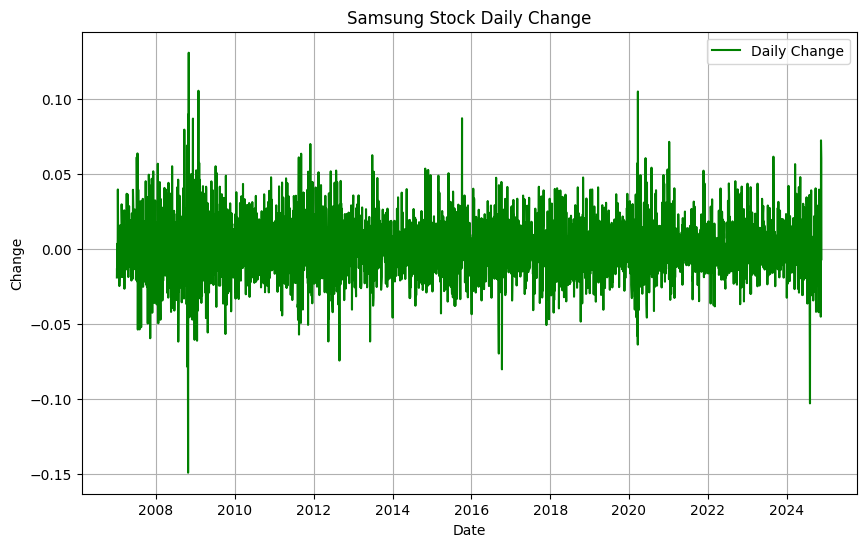

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(df['Daily_Change'], label = 'Daily Change', color = 'green')
plt.title('Samsung Stock Daily Change')
plt.xlabel('Date')
plt.ylabel('Change')
plt.legend()
plt.grid(True)
plt.show()

Q4. During which periods did Samsung stock experience the highest volatility?

In [ ]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,Daily_Change
Date,,,,,,,
2007-01-02,9109.592773,12520.0,12540.0,12320.0,12400.0,17607300,NaN
2007-01-03,8934.966797,12280.0,12560.0,12220.0,12540.0,19676500,-0.019169
2007-01-04,8818.548828,12120.0,12240.0,12060.0,12220.0,18258900,-0.013029
2007-01-05,8658.477539,11900.0,12180.0,11900.0,12160.0,28400400,-0.018152
2007-01-08,8498.408203,11680.0,11880.0,11580.0,11840.0,33081550,-0.018487


In [ ]:
highest_volatility = df[df['Daily_Change'].abs() > 0.05]
highest_volatility

,Adj Close,Close,High,Low,Open,Volume,Daily_Change
Date,,,,,,,
2007-07-06,9132.002930,12540.0,12640.0,11980.0,12060.0,82871050,0.060914
2007-07-13,10005.878906,13740.0,13740.0,13180.0,13300.0,68696450,0.063468
2007-07-16,9466.988281,13000.0,13720.0,12960.0,13700.0,48383750,-0.053857
2007-08-01,8462.030273,11620.0,12100.0,11520.0,12000.0,53035500,-0.053746
2007-08-16,8447.465820,11600.0,11800.0,11580.0,11680.0,50978800,-0.052288
...,...,...,...,...,...,...,...
2023-09-01,69280.328125,71000.0,71000.0,66700.0,66800.0,29738235,0.061286
2024-03-20,75786.960938,76900.0,77200.0,73400.0,73700.0,50106297,0.056319
2024-08-05,71001.617188,71400.0,76900.0,70200.0,76700.0,54608790,-0.103015


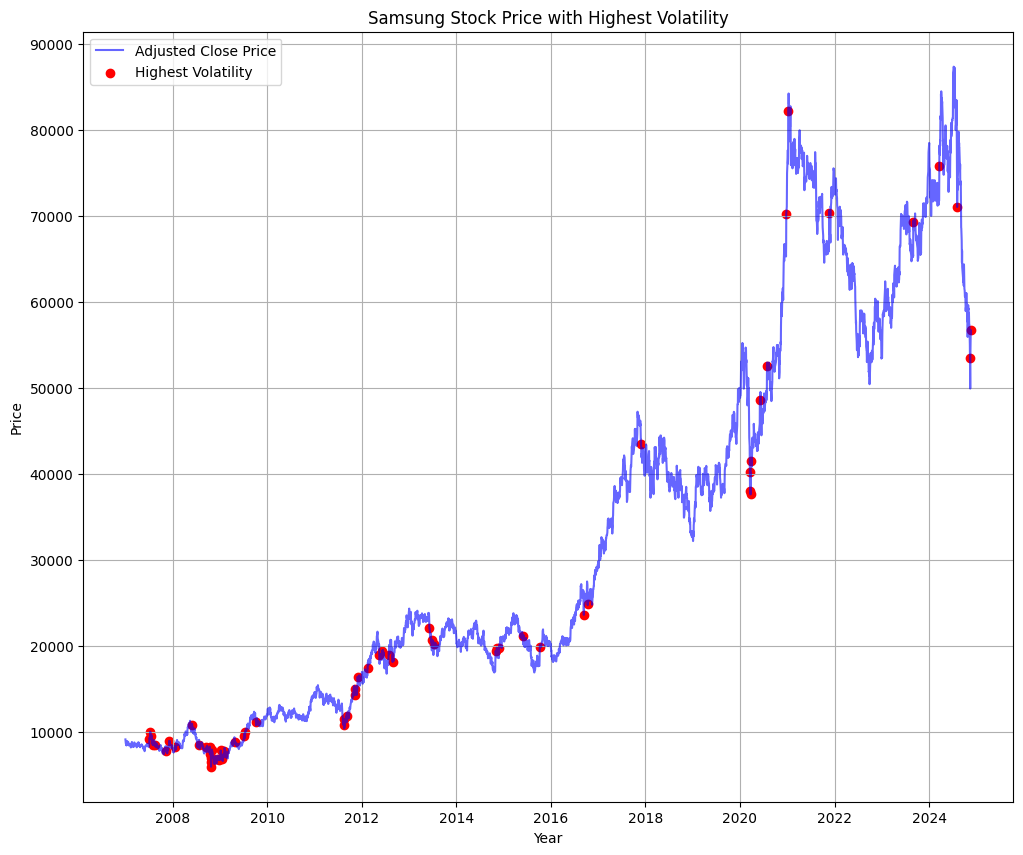

In [ ]:
plt.figure(figsize = (12,10))
plt.plot(df['Adj Close'], label = 'Adjusted Close Price',color = 'blue',alpha = 0.6)
plt.scatter(highest_volatility.index, highest_volatility['Adj Close'],color = 'red', label = 'Highest Volatility')
plt.title('Samsung Stock Price with Highest Volatility')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Q5. How does the stock price correlate with trading volume?

In [ ]:
df.head(2)

,Adj Close,Close,High,Low,Open,Volume,Daily_Change
Date,,,,,,,
2007-01-02,9109.592773,12520.0,12540.0,12320.0,12400.0,17607300,NaN
2007-01-03,8934.966797,12280.0,12560.0,12220.0,12540.0,19676500,-0.019169


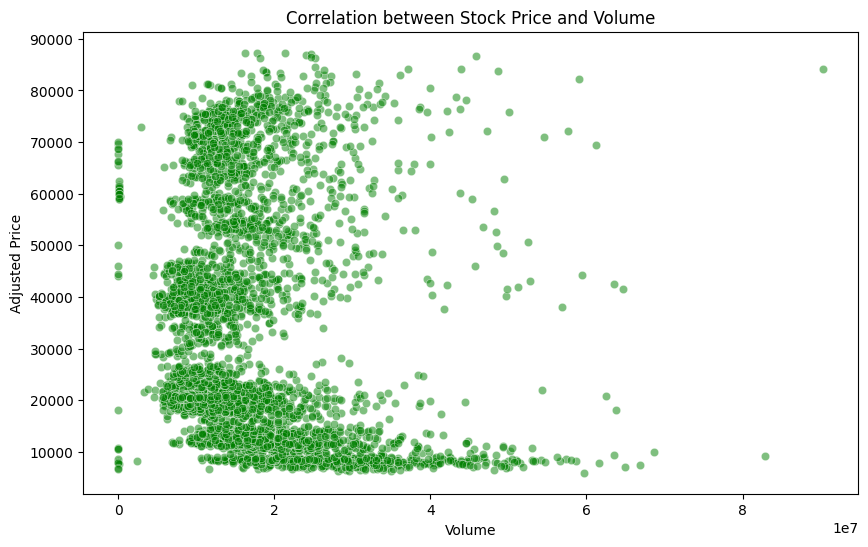

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Volume',y = 'Adj Close', data = df, color = 'green',alpha = 0.5)
plt.title('Correlation between Stock Price and Volume')
plt.xlabel('Volume')
plt.ylabel('Adjusted Price')
plt.show()

Q.6 How has trading volume changed over the years?

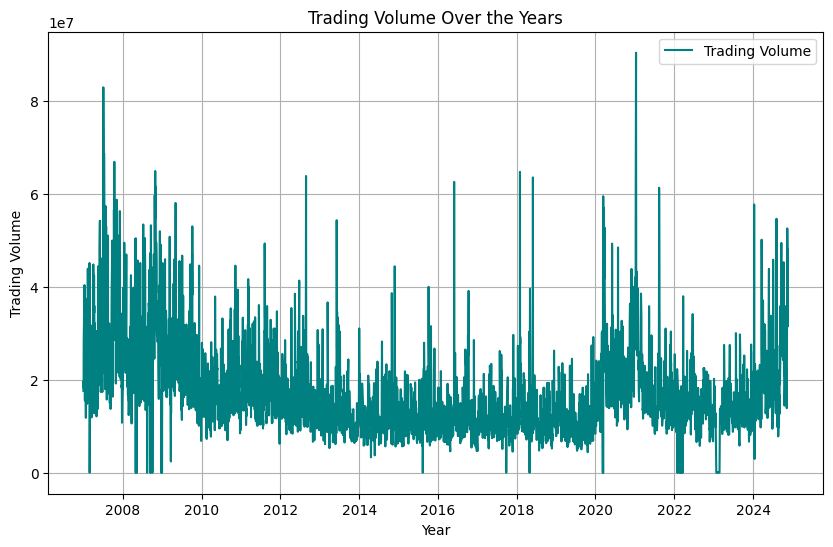

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(df['Volume'], label = 'Trading Volume',color = 'teal')
plt.title('Trading Volume Over the Years')
plt.xlabel('Year')
plt.ylabel('Trading Volume')
plt.legend()
plt.grid(True)
plt.show()